# Intensity profiler
__Written by:__ Stefano Vianello [EPFL]
<br/> <br/>
This notebook will guide you through the visualisation of measured immunostaining patterns.
__To proceed__, run each cell at a time (click, then Ctrl+Shift+Enter), and follow the prompts appearing on screen

#### 0. Run this cells to import all packages

In [1]:
#----------------------------------------------------
# IMPORT LIBRARIES AND PACKAGES REQUIRED IN THE CODE
#----------------------------------------------------

import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib
import matplotlib.pylab as plt

import seaborn as sns
from seaborn import color_palette
import pandas as pd

#### 1. Import your data table
_Note:_ The code assumes that data is provided in a [tidydata](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) format, as a __.csv__ file, with the following columns:
* roi: numbers from 0 to X, each sample analysed
* x: the x coordinates (position along the length) of each sample
* 1: the intensity values of the first channel
* 2: the intensity values of the second channel

In [2]:
## run this cell to define the path to your datatable
datapath = input("Copy the path to the data table: ") 
#e.g. C:/Users/30227/Desktop/DataTable.csv
#e.g. ./SampleData.csv

Copy the path to the data table: C:/Users/30227/Documents/GitHub/Sites/Intensity_Profiler/SampleData.csv


In [3]:
## run this cell to get a preview of the data you loaded
df = pd.read_csv(datapath)
df

,roi,x,1,2
0,0,0.000000,0.042187,0.021884
1,0,0.003610,0.057510,0.018107
2,0,0.007220,0.068102,0.031861
3,0,0.010830,0.074758,0.039747
4,0,0.014440,0.094401,0.064655
...,...,...,...,...
3952,10,0.981900,0.026429,0.015798
3953,10,0.986425,0.013214,0.033859
3954,10,0.990950,0.013214,0.027085
3955,10,0.995475,0.013214,0.011286


In [4]:
## run this cell to define the genes you stained
gene1 = input("What is gene number 1? ")
gene2 = input("What is gene number 2? ")
titles = [gene1, gene2]

What is gene number 1? Pax3/7
What is gene number 2? Olig2


In [5]:
## run this cell to sort the values (for later plotting)
df_sorted = df.sort_values(by=['x'])

### 2. Set plot colours

In [6]:
## run this cell to set list of colors to use
colors = ['limegreen', 'violet'] # <-- you can change these!

### 3. Scatterplots

In [7]:
## we will start to generate plots with the default white background
plt.style.use("default")

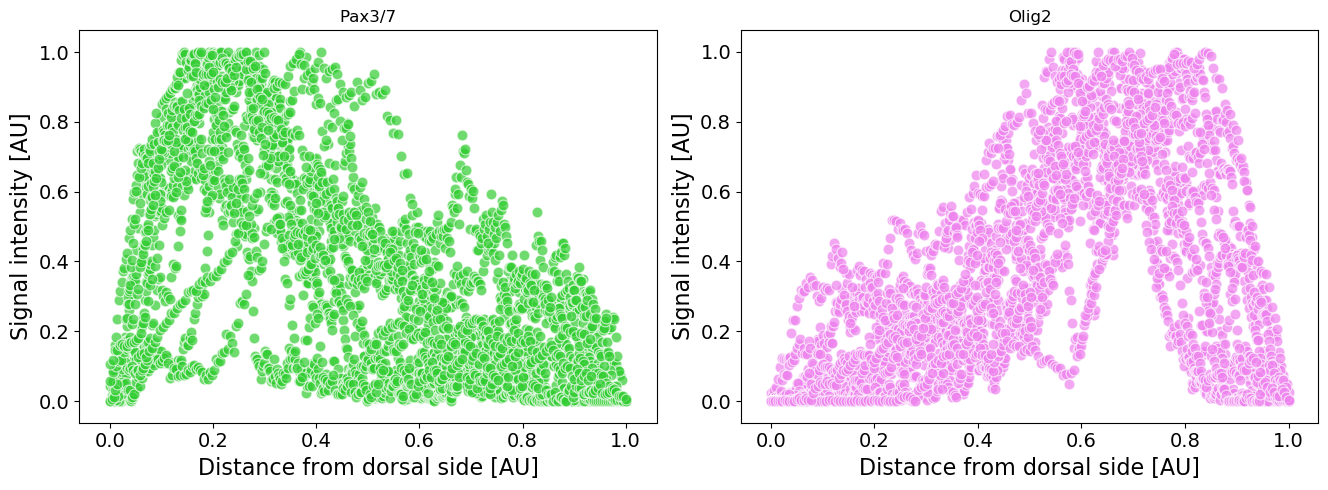

In [8]:
## Plots separate scatterplots for each marker
fig_scatterplots = plt.figure(figsize=[20,5])

for i in [1,2]:
    plt.subplot(1,3,i).title.set_text(titles[i-1])
    sns.scatterplot(x="x", y=str(i), data=df, alpha=0.7, color=colors[i-1], s=60)
    # set plot parameters
    plt.xlabel('Distance from dorsal side [AU]', fontsize=16)
    plt.ylabel('Signal intensity [AU]', fontsize=16)
    plt.xticks( fontsize=14);
    plt.yticks(fontsize=14);
    # fit plots in the figure
    plt.tight_layout()

In [9]:
## code to select the order of all your polynomial fits
order_of_polynomial = int(input("Insert your chosen order for the polynomial fit: ") )

Insert your chosen order for the polynomial fit: 6


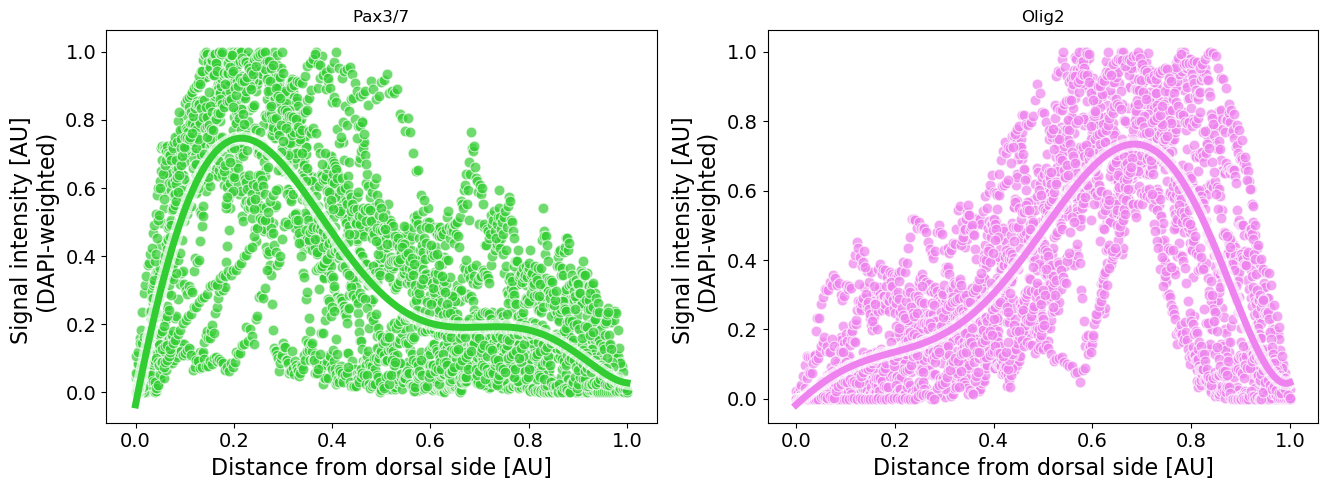

In [10]:
## Plots separate scatterplots + polynomal fit
fig_scatterplots = plt.figure(figsize=[20,5])

for i in [1,2]:
    plt.subplot(1,3,i).title.set_text(titles[i-1])
    sns.scatterplot(x="x", y=str(i), data=df, alpha=0.7, color=colors[i-1], s=60)
    # set plot parameters
    plt.xlabel('Distance from dorsal side [AU]', fontsize=16)
    plt.ylabel('Signal intensity [AU] \n (DAPI-weighted)', fontsize=16)
    plt.xticks( fontsize=14);
    plt.yticks(fontsize=14);
    #### add fit lines
    df_sorted = df.sort_values(by=['x'])
    coefs = poly.polyfit(df_sorted["x"], df_sorted[str(i)], order_of_polynomial)
    ffit = poly.polyval(df_sorted["x"], coefs)
    plt.plot(df_sorted["x"], ffit, "white", linewidth=10, alpha=0.7)
    plt.plot(df_sorted["x"], ffit, colors[i-1], linewidth=5)
    ####
    # fit plots in the figure
    plt.tight_layout()

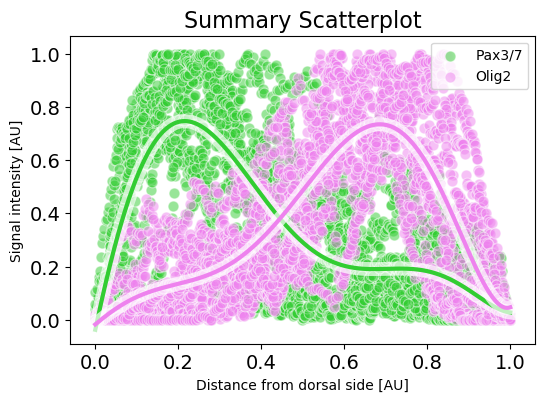

In [11]:
## Plots both markers on the same scatterplot
fig_scatterplots = plt.figure(figsize=[6,4])

for i in [1,2]:
        final_plot = sns.scatterplot(x="x", y=str(i), data=df, alpha=0.5, color=colors[i-1], label=titles[i-1], s=60)
        # set plot parameters
        plt.title('Summary Scatterplot', fontsize=16)
        plt.xlabel('Distance from dorsal side [AU]', fontsize=10)
        plt.ylabel('Signal intensity [AU]', fontsize=10)
        plt.xticks( fontsize=14);
        plt.yticks(fontsize=14)
         #### add fit lines
        df_sorted = df.sort_values(by=['x'])
        coefs = poly.polyfit(df_sorted["x"], df_sorted[str(i)], order_of_polynomial)
        ffit = poly.polyval(df_sorted["x"], coefs)
        plt.plot(df_sorted["x"], ffit, "white", linewidth=10, alpha=0.7)
        plt.plot(df_sorted["x"], ffit, colors[i-1], linewidth=3)
        ####

In [12]:
## we will now generate the same plots but with a dark bacground
plt.style.use("dark_background")

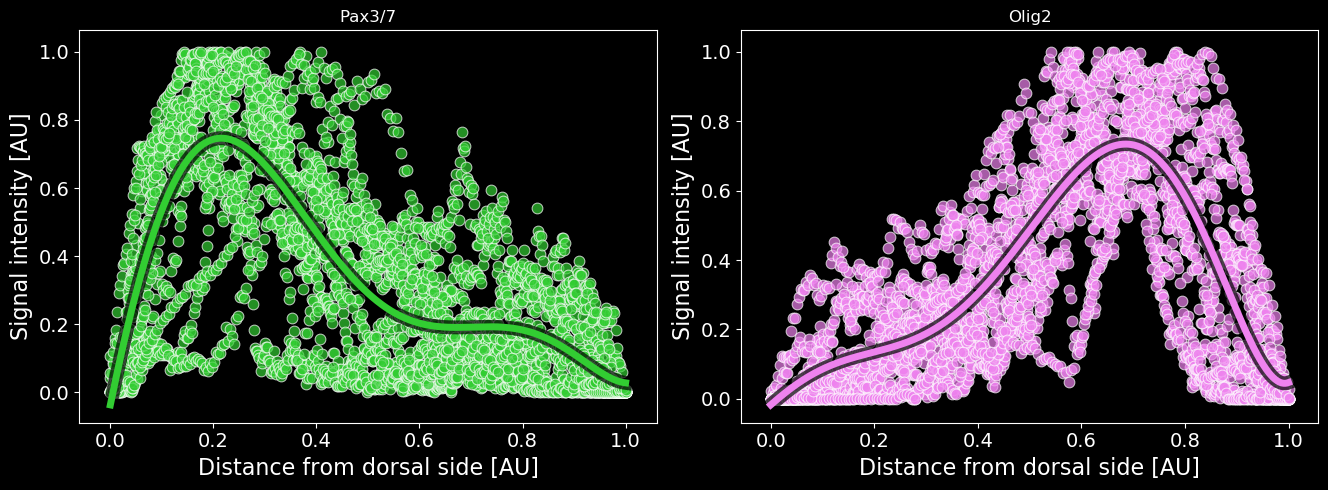

In [13]:
## Plots separate scatterplots + polynomal fit
fig_scatterplots = plt.figure(figsize=[20,5])

for i in [1,2]:
    plt.subplot(1,3,i).title.set_text(titles[i-1])
    sns.scatterplot(x="x", y=str(i), data=df, alpha=0.7, color=colors[i-1], s=60)
    # set plot parameters
    plt.xlabel('Distance from dorsal side [AU]', fontsize=16)
    plt.ylabel('Signal intensity [AU]', fontsize=16)
    plt.xticks( fontsize=14);
    plt.yticks(fontsize=14);
    #### add fit lines
    df_sorted = df.sort_values(by=['x'])
    coefs = poly.polyfit(df_sorted["x"], df_sorted[str(i)], order_of_polynomial)
    ffit = poly.polyval(df_sorted["x"], coefs)
    plt.plot(df_sorted["x"], ffit, "black", linewidth=10, alpha=0.7)
    plt.plot(df_sorted["x"], ffit, colors[i-1], linewidth=5)
    ####
    # fit plots in the figure
    plt.tight_layout()

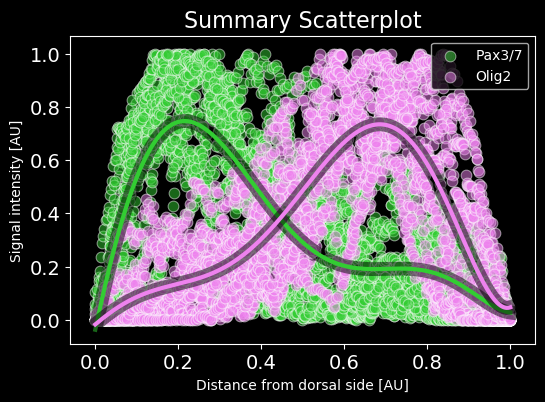

In [14]:
## Plots both markers on the same scatterplot
fig_scatterplots = plt.figure(figsize=[6,4])

for i in [1,2]:
        final_plot = sns.scatterplot(x="x", y=str(i), data=df, alpha=0.5, color=colors[i-1], label=titles[i-1], s=60)
        # set plot parameters
        plt.title('Summary Scatterplot', fontsize=16)
        plt.xlabel('Distance from dorsal side [AU]', fontsize=10)
        plt.ylabel('Signal intensity [AU]', fontsize=10)
        plt.xticks( fontsize=14);
        plt.yticks(fontsize=14)
         #### add fit lines
        df_sorted = df.sort_values(by=['x'])
        coefs = poly.polyfit(df_sorted["x"], df_sorted[str(i)], order_of_polynomial)
        ffit = poly.polyval(df_sorted["x"], coefs)
        plt.plot(df_sorted["x"], ffit, "black", linewidth=10, alpha=0.5)
        plt.plot(df_sorted["x"], ffit, colors[i-1], linewidth=3)
        ####

### 4. Lineplots

In [15]:
## set color palettes for the lines
#palettes = ["Greens", "RdPu"] # <-- you can change these!

# if you want all individual lines the same color use the palettes below instead:
palettes = [sns.light_palette("limegreen", n_colors=max(df["roi"])+1), sns.light_palette("violet", n_colors=max(df["roi"])+1)]

In [16]:
## choose light or dark theme (comment out the one you don't want)
plt.style.use("default")                 # <- light theme
#plt.style.use("dark_background")        # <- dark theme

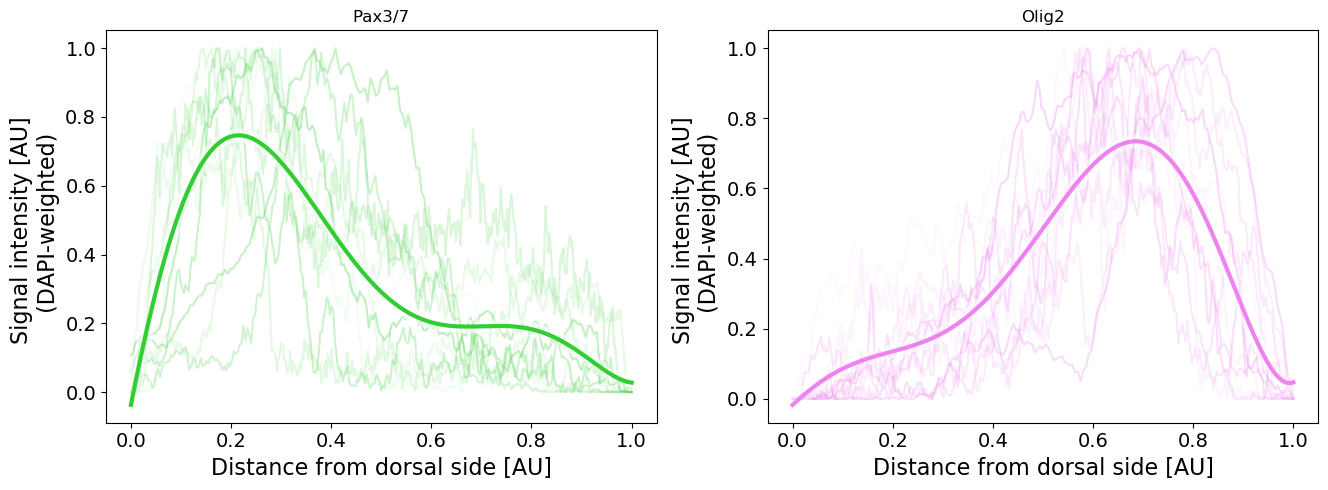

In [17]:
fig_lineplots = plt.figure(figsize=[20,5])

# for each channel, add the corresponding plot in the figure
for i in [1,2]:
    plt.subplot(1,3,i).title.set_text(titles[i-1])
    sns.lineplot(x="x", y=str(i), data=df, alpha=0.3, hue="roi", palette=palettes[i-1]).legend_.remove()
    # set plot parameters
    plt.xlabel('Distance from dorsal side [AU]', fontsize=16)
    plt.ylabel('Signal intensity [AU] \n (DAPI-weighted)', fontsize=16)
    plt.xticks( fontsize=14);
    plt.yticks(fontsize=14);
     #### add fit lines
    df_sorted = df.sort_values(by=['x'])
    coefs = poly.polyfit(df_sorted["x"], df_sorted[str(i)], order_of_polynomial)
    ffit = poly.polyval(df_sorted["x"], coefs)
    plt.plot(df_sorted["x"], ffit, "white", linewidth=10, alpha=0.5)
    plt.plot(df_sorted["x"], ffit, colors[i-1], linewidth=3)
    # fit plots in the figure
    plt.tight_layout()
   

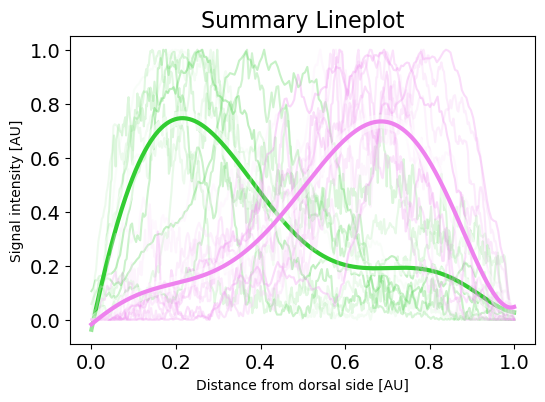

In [19]:
## Plots both markers on the same lineplot
fig_scatterplots = plt.figure(figsize=[6,4])

for i in [1,2]:
        final_plot = sns.lineplot(x="x", y=str(i), data=df, alpha=0.3, hue="roi", palette=palettes[i-1]).legend_.remove()
        # set plot parameters
        plt.title('Summary Lineplot', fontsize=16)
        plt.xlabel('Distance from dorsal side [AU]', fontsize=10)
        plt.ylabel('Signal intensity [AU]', fontsize=10)
        plt.xticks( fontsize=14);
        plt.yticks(fontsize=14)
         #### add fit lines
        df_sorted = df.sort_values(by=['x'])
        coefs = poly.polyfit(df_sorted["x"], df_sorted[str(i)], order_of_polynomial)
        ffit = poly.polyval(df_sorted["x"], coefs)
        plt.plot(df_sorted["x"], ffit, "white", linewidth=10, alpha=0.5)
        plt.plot(df_sorted["x"], ffit, colors[i-1], linewidth=3)
        ####

### 5. 1D heatmap

In [20]:
## choose light or dark theme (comment out the one you don't want)
plt.style.use("default")                 # <- light theme
#plt.style.use("dark_background")        # <- dark theme

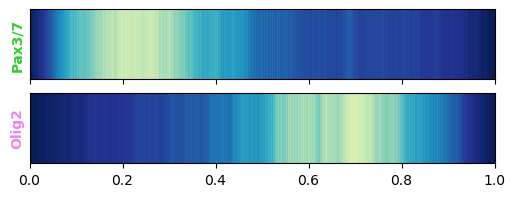

In [21]:
plt.rcParams["figure.figsize"] = 6,1
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

colormaps = ["YlGnBu_r", "YlGnBu_r"]

x = df_sorted["x"]

extent = [0,1,0,1]
y = df_sorted["1"]
ax1.imshow(y[np.newaxis,:], cmap=colormaps[0], aspect="auto", extent=extent, interpolation="bicubic")
ax1.set_yticks([])
ax1.set_ylabel(titles[0], fontweight='bold')
ax1.yaxis.label.set_color(colors[0])
ax1.set_xlim(extent[0], extent[1])

y = df_sorted["2"]
ax2.imshow(y[np.newaxis,:], cmap=colormaps[1], aspect="auto", extent=extent, interpolation="bicubic")
ax2.set_yticks([])
ax2.set_ylabel(titles[1], fontweight='bold')
ax2.yaxis.label.set_color(colors[1])
ax2.set_xlim(extent[0], extent[1])


fig.set_figheight(2)

In [22]:
## table cleanup (remove artifact from multiple 0 and 1 positions)
df_cleaned = df_sorted[df_sorted["x"] != 0]
df_cleaned = df_cleaned[df_cleaned["x"] != 1]

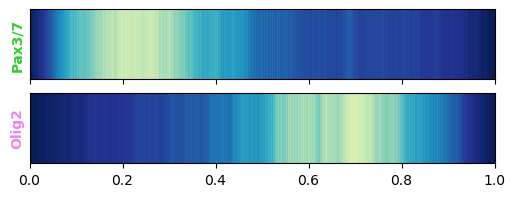

In [23]:
# replotting
plt.rcParams["figure.figsize"] = 6,1
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

colormaps = ["YlGnBu_r", "YlGnBu_r"]

x = df_cleaned["x"]

extent = [0,1,0,1]
y = df_sorted["1"]
ax1.imshow(y[np.newaxis,:], cmap=colormaps[0], aspect="auto", extent=extent, interpolation="bicubic")
ax1.set_yticks([])
ax1.set_ylabel(titles[0], fontweight='bold')
ax1.yaxis.label.set_color(colors[0])
ax1.set_xlim(extent[0], extent[1])

y = df_sorted["2"]
ax2.imshow(y[np.newaxis,:], cmap=colormaps[1], aspect="auto", extent=extent, interpolation="bicubic")
ax2.set_yticks([])
ax2.set_ylabel(titles[1], fontweight='bold')
ax2.yaxis.label.set_color(colors[1])
ax2.set_xlim(extent[0], extent[1])


fig.set_figheight(2)